# Buckled Layer

In [1]:
from pythtb.tb_model import TBModel 
import matplotlib.pyplot as plt

In [2]:
# real space is 3D
# define lattice vectors
lat = [[1, 0, 0], [0, 1.25, 0], [0, 0, 3]]
# define coordinates of orbitals
orb = [[0, 0, -0.15], [0.5, 0.5, 0.15]]

# only first two lattice vectors repeat, so k-space is 2D
my_model = TBModel(2, 3, lat, orb)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 3
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ,    0   ]
  # 1 ===> [   0   ,  1.250 ,    0   ]
  # 2 ===> [   0   ,    0   ,  3.000 ]
Orbital vectors (dimensionless):
  # 0 ===> [   0   ,    0   , -0.150 ]
  # 1 ===> [ 0.500 ,  0.500 ,  0.150 ]
Site energies:
  # 0 ===> -1.100 
  # 1 ===>  1.100 
Hoppings:
  < 1 | H | 0 + [ 0.0 ,  0.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  0.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 0.0 ,  1.0 ,  0.0 ] >  ===> 0.6000 
  < 1 | H | 0 + [ 1.0 ,  1.0 ,  0.0 ] >  ===> 0.6000 
Hopping distances:
  | pos(1) - pos(0 + [ 0.0 ,  0.0 ,  0.0 ]) | =  1.204 
  | pos(1) - pos(0 + [ 1.0 ,  0.0 ,  0.0 ]) | =  1.204 
  | pos(1) -

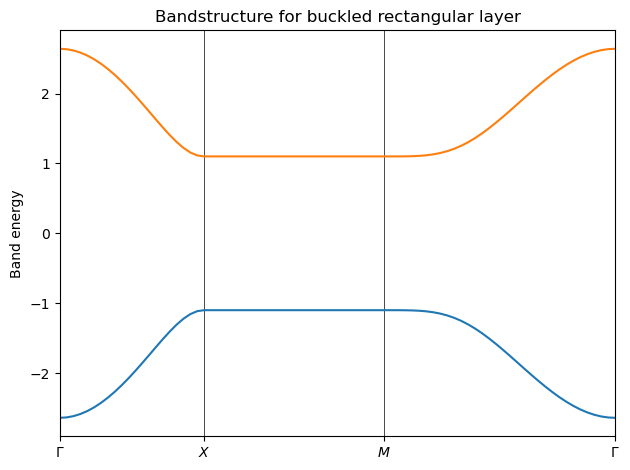

In [3]:
delta = 1.1
t = 0.6

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 1, 0, [0, 0, 0])
my_model.set_hop(t, 1, 0, [1, 0, 0])
my_model.set_hop(t, 1, 0, [0, 1, 0])
my_model.set_hop(t, 1, 0, [1, 1, 0])

# print tight-binding model
print(my_model)

# ----------------------------------------
# specify k-space path
# ----------------------------------------

# specify a path in k-space by listing a set of nodes; the path
# will consist of straight line segments connecting these nodes
path = [[0.0, 0.0], [0.0, 0.5], [0.5, 0.5], [0.0, 0.0]]

# specify labels for these nodal points
label = (r"$\Gamma $", r"$X$", r"$M$", r"$\Gamma $")

# call function k_path to construct the actual path
(k_vec, k_dist, k_node) = my_model.k_path(path, 81)
# inputs:
#   path: see above
#   81: number of interpolated k-points to be plotted
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

# ----------------------------------------
# do bandstructure calculation
# ----------------------------------------
print("Calculating bandstructure...")
evals = my_model.solve_ham(k_vec)

# ----------------------------------------
# plot band structure
# ----------------------------------------
print("Plotting bandstructure...")

# Initialize plot
fig, ax = plt.subplots()
ax.set_title("Bandstructure for buckled rectangular layer")
ax.set_ylabel("Band energy")

# specify horizontal axis details
ax.set_xlim(k_node[0], k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
    ax.axvline(x=k_node[n], linewidth=0.5, color="k")

# Plot two bands
ax.plot(k_dist, evals)
# ax.plot(k_dist, evals[1])

# save as PDF
fig.tight_layout()